In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'REFUSAL_ENTRY_2014-October2023.csv'

# Try different encodings: 'utf-8', 'latin1', or 'ISO-8859-1'
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']

# Attempt to read the CSV file with different encodings
for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        # If successful, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding {encoding}")

# Display the first few rows of the DataFrame to inspect the data
df.head()


Failed to read with encoding utf-8


,MFG_FIRM_FEI_NUM,LGL_NAME,LINE1_ADRS,LINE2_ADRS,CITY_NAME,PROVINCE_STATE,ISO_CNTRY_CODE,PRODUCT_CODE,REFUSAL_DATE,DISTRICT,ENTRY_NUM,RFRNC_DOC_ID,LINE_NUM,LINE_SFX_ID,FDA_SAMPLE_ANALYSIS,PRIVATE_LAB_ANALYSIS,REFUSAL_CHARGES,PRDCT_CODE_DESC_TEXT
0,3016998564,"xinyayuan biotech co., ltd",Standard Building 8,Zhusong; Intensive Processing Zone Of Agricult...,Chengdu,Sichuan,CN,25RGH99,09-Oct-20,DNEI,EKH-0734521-1,72,1,NaN,No,No,249,"MUSHROOMS AND OTHER FUNGI PRODUCTS, BROKEN OR ..."
1,3016638548,TRIPLE CROWN FOODS INC,26 Main St Ste A,NaN,Kings Park,NY,US,25JFD24,07-Apr-20,DSEI,EKM-0147848-3,11,36,NaN,No,No,249,GINGER ROOT (ROOT & TUBER VEGETABLE)
2,3014453449,Three Squirrels Inc.,No. 8 Jiusheng Road,"High Tech Industrial Development Zone, Yijiang...",Wuhu,Anhui,CN,33LGT12,27-Aug-19,DWCI,EKU-0054443-4,182,1,NaN,No,No,"324, 473","MIXED/ASSORTED SOFT CANDY WITHOUT NUTS, FRUIT ..."
3,2000005205,Pablo Ignacio Michel Ontiveros,Quintana Roo 1611,Col. Guadalupana,Guadalajara,Jalisco,MX,23BGT07,23-Oct-17,DSWI,EMK-0028113-4,11,2,NaN,Yes,No,"11, 256, 274","PEANUT, SHELLED"
4,3013071463,"Shantou Olive Pharmaceutical Co.,Ltd",NO. 4 Chaoshanlu Xixiang,Jinping,Shantou,Guangdong,CN,66VBY99,29-Jun-16,LOS-DO,EPG-3005802-1,1,36,NaN,No,No,"72, 218, 238, 328","MISCELLANEOUS PATENT MEDICINES, ETC."


In [7]:
import pandas as pd


# Step 1: Extract 'YEAR' and 'MONTH' from 'REFUSAL_DATE'
df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])
df['YEAR'] = df['REFUSAL_DATE'].dt.year
df['MONTH'] = df['REFUSAL_DATE'].dt.month

# Step 2: Group by 'ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME', 'YEAR', and 'MONTH'
grouped_by_location = df.groupby(['ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME', 'YEAR', 'MONTH'])

# Step 3: Count the number of violations for each group and select 'ENTRY_NUM' column
violations_by_location = grouped_by_location.count().loc[:, ['ENTRY_NUM']].reset_index()

# Step 4: Save the results to CSV files
violations_by_location.to_csv('country_violations_2014-2023.csv', index=False)

# Group by 'YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', and 'CITY_NAME'
grouped_by_year_month_location = df.groupby(['YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME'])

# Count the number of violations for each group and select 'ENTRY_NUM' column
violations_by_year_month_location = grouped_by_year_month_location.count().loc[:, ['ENTRY_NUM']].reset_index()

# Save the results to another CSV file
violations_by_year_month_location.to_csv('country_violations_year_month_2014-2023.csv', index=False)


C:\Users\User\AppData\Local\Temp\ipykernel_2396\2294576778.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])


# Which city, country, province had the most violations in a single month? How many? Which month and year?


In [8]:
# Group by 'YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', and 'CITY_NAME'
grouped_by_location_month = df.groupby(['YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME'])

# Count the number of violations for each group and select 'ENTRY_NUM' column
violations_by_location_month = grouped_by_location_month.count().loc[:, ['ENTRY_NUM']].reset_index()

# Find the row with the maximum number of violations
max_violations_row = violations_by_location_month.loc[violations_by_location_month['ENTRY_NUM'].idxmax()]

# Extract information from the row
most_violations_city = max_violations_row['CITY_NAME']
most_violations_country = max_violations_row['ISO_CNTRY_CODE']
most_violations_province = max_violations_row['PROVINCE_STATE']
max_violations_count = max_violations_row['ENTRY_NUM']
month_with_most_violations = max_violations_row['MONTH']
year_with_most_violations = max_violations_row['YEAR']

# Print the results
print(f"The city with the most violations in a single month is {most_violations_city}, "
      f"located in {most_violations_country}, {most_violations_province}.")
print(f"The count of violations is {max_violations_count}.")
print(f"This occurred in {month_with_most_violations}/{year_with_most_violations}.")


The city with the most violations in a single month is Ciudad De Mexico, located in MX, Ciudad de Mexico.
The count of violations is 613.
This occurred in 4/2022.


# What are the 10 most frequent products in the IRR for 2018 (using 'PRDCT_CODE_DESC_TEXT')?

In [9]:
# Filter the data for the year 2018
df_2018 = df[df['YEAR'] == 2018]

# Group by 'PRDCT_CODE_DESC_TEXT' and count the occurrences
product_counts = df_2018['PRDCT_CODE_DESC_TEXT'].value_counts()

# Select the top 10 most frequent products
top_10_products = product_counts.head(10)

# Display the results
print("Top 10 Most Frequent Products in IRR for 2018:")
print(top_10_products)


Top 10 Most Frequent Products in IRR for 2018:
PRDCT_CODE_DESC_TEXT
SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE)                                               575
MISCELLANEOUS PATENT MEDICINES, ETC.                                                                 433
VITAMIN, MINERAL, PROTEINS AND UNCONVENTIONAL DIETARY SPECIALITIES FOR HUMANS AND ANIMALS, N.E.C.    298
TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)                                                  244
HERBALS & BOTANICALS (NOT TEAS), N.E.C.                                                              237
MAHI MAHI                                                                                            190
ULTRAVIOLET SCREEN/SUNSCREEN N.E.C.                                                                  183
GLOVE, PATIENT EXAMINATION, POLY                                                                     173
BATH SOAPS AND DETERGENTS (NOT ANTIPERSPIRANT) (PERSONAL CLEANLINESS)                       

#  What was the company associated with the largest violation in a single month?

In [10]:
# Find the row with the maximum number of violations
max_violations_row = df.loc[df['ENTRY_NUM'].idxmax()]

# Extract information from the row
largest_violation_company = max_violations_row['LGL_NAME']
max_violations_count = max_violations_row['ENTRY_NUM']
month_with_largest_violation = max_violations_row['MONTH']
year_with_largest_violation = max_violations_row['YEAR']

# Print the results
print(f"The company associated with the largest violation in a single month is {largest_violation_company}.")
print(f"The count of violations is {max_violations_count}.")
print(f"This occurred in {month_with_largest_violation}/{year_with_largest_violation}.")


The company associated with the largest violation in a single month is OBS LAB CO LTD.
The count of violations is XXX-0597473-6.
This occurred in 10/2023.


# Perform K-means analysis

In [13]:
pip install scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.1 MB/s eta 0:00:09
                                              0.2/9.2 MB 1.1 MB/s eta 0:00:08
     -                                        0.3/9.2 MB 1.3 MB/s eta 0:00:07
     -                                        0.4/9.2 MB 1.7 MB/s eta 0:00:06
     --                                       0.6/9.2 MB 2.0 MB/s eta 0:00:05
     ---                                      0.7/9.2 MB 2.2 MB/s eta 0:00:04
     ----                                     1.0/9.2 MB 2.6 MB/s eta 0:00:04
     -----                                    1.4/9.2 MB 3.1 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.1 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.1 MB/s eta 0:00:03
     ------                                   1.6/9.2 MB 2.8 MB/s eta 0:00:03



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 1.4 MB/s eta 0:00:06
                                              0.1/7.6 MB 653.6 kB/s eta 0:00:12
                                              0.1/7.6 MB 901.1 kB/s eta 0:00:09
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.3/7.6 MB 610.3 kB/s eta 0:00:13
     -                                        0.3/7.6 MB 655.4 kB/s eta 0:00:12
     -                                        0.3/7.6 MB 636.4 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset into a DataFrame
# Try both encodings: 'latin1' and 'ISO-8859-1'
try:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')

# Use the columns "RFRNC_DOC_ID" and "REFUSAL_CHARGES" for clustering
numerical_columns = ['REFUSAL_CHARGES']
categorical_columns = ['RFRNC_DOC_ID']

# Clean and convert "REFUSAL_CHARGES" to numeric format
df['REFUSAL_CHARGES'] = pd.to_numeric(df['REFUSAL_CHARGES'].str.replace(',', ''), errors='coerce')

# Separate numerical and categorical features
numerical_features = df[numerical_columns]
categorical_features = df[categorical_columns]

# Handle missing values in numerical features
numerical_imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(numerical_imputer.fit_transform(numerical_features), columns=numerical_columns)

# Combine imputed numerical and categorical features
df_imputed = pd.concat([numerical_features_imputed, categorical_features], axis=1)

# Create a column transformer for preprocessing
preprocessor = StandardScaler()

# Apply the preprocessing steps
df_processed = preprocessor.fit_transform(df_imputed)

# Specify different values of K
k_values = [5, 10, 12]

for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'cluster_{k}'] = kmeans.fit_predict(df_processed)

    # Get centroids (inverse transform to original scale)
    centroids = pd.DataFrame(
        preprocessor.inverse_transform(kmeans.cluster_centers_),
        columns=numerical_columns + categorical_columns
    )

    # Print centroids for each cluster
    print(f"\nCentroids for K={k}:")
    print(centroids)

# Display the DataFrame with cluster assignments
print("\nDataFrame with Cluster Assignments:")
print(df[['RFRNC_DOC_ID', 'REFUSAL_CHARGES'] + [f'cluster_{k}' for k in k_values]])


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Centroids for K=5:
   REFUSAL_CHARGES  RFRNC_DOC_ID
0       341.418681     20.709151
1      3164.194550     30.192937
2       363.167429   1337.213049
3       393.566378    351.696918
4       427.805695   4118.626263


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Centroids for K=10:
   REFUSAL_CHARGES  RFRNC_DOC_ID
0       548.243145     15.326353
1      2449.743039     18.441570
2       334.421276   2228.103448
3       346.944940    188.697802
4      3600.274768     22.142497
5       406.743156   4601.632353
6       147.927808     17.076623
7       332.906071   1181.439316
8      2831.969259    482.726944
9       284.692581    522.653493


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Centroids for K=12:
    REFUSAL_CHARGES  RFRNC_DOC_ID
0        548.311688     12.392008
1       3600.274768     22.142497
2        410.523880   5057.488889
3        372.058797   1662.473510
4        283.654182    507.475058
5        146.197964     13.909125
6        329.962707    248.750631
7       2449.743039     18.441570
8       2831.969259    482.726944
9        299.166194    949.130159
10       375.744183   3065.662500
11       355.060715    107.588833

DataFrame with Cluster Assignments:
        RFRNC_DOC_ID  REFUSAL_CHARGES  cluster_5  cluster_10  cluster_12
0                 72            249.0          0           6          11
1                 11            249.0          0           6           5
2                182              NaN          0           3           6
3                 11              NaN          0           0           0
4                  1              NaN          0           0           0
...              ...              ...        ...         ...  

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


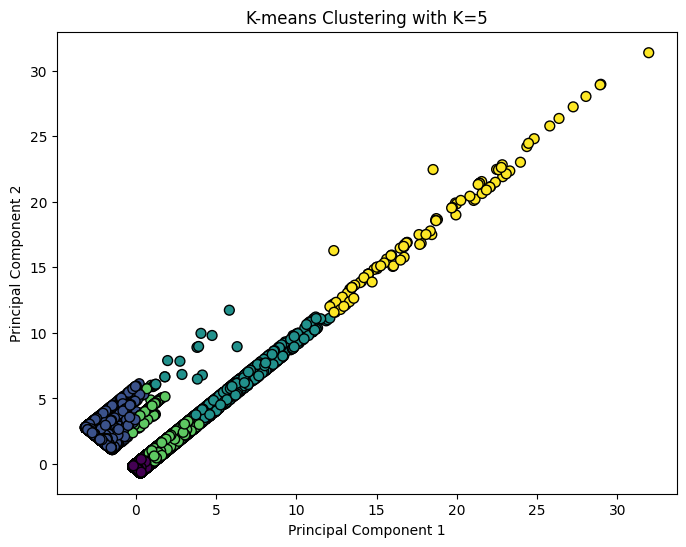

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


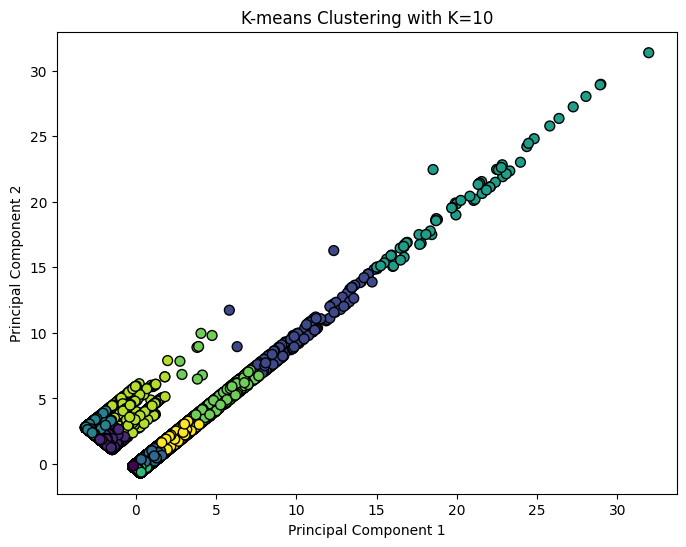

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


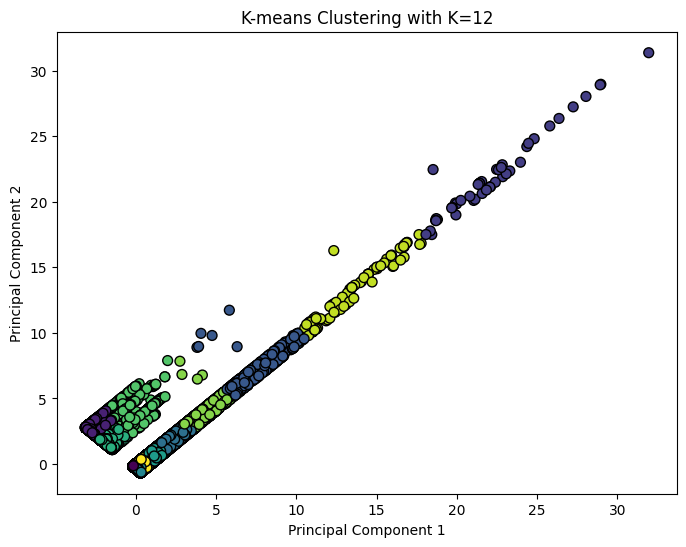

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset into a DataFrame
try:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')

# Use the columns "RFRNC_DOC_ID" and "REFUSAL_CHARGES" for clustering
numerical_columns = ['REFUSAL_CHARGES']
categorical_columns = ['RFRNC_DOC_ID']

# Clean and convert "REFUSAL_CHARGES" to numeric format
df['REFUSAL_CHARGES'] = pd.to_numeric(df['REFUSAL_CHARGES'].str.replace(',', ''), errors='coerce')

# Separate numerical and categorical features
numerical_features = df[numerical_columns]
categorical_features = df[categorical_columns]

# Handle missing values in numerical features
numerical_imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(numerical_imputer.fit_transform(numerical_features), columns=numerical_columns)

# Combine imputed numerical and categorical features
df_imputed = pd.concat([numerical_features_imputed, categorical_features], axis=1)

# Create a column transformer for preprocessing
preprocessor = StandardScaler()

# Apply the preprocessing steps
df_processed = preprocessor.fit_transform(df_imputed)

# Apply PCA to reduce dimensionality for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)

# Specify different values of K
k_values = [5, 10, 12]

# Plot the clusters
for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'cluster_{k}'] = kmeans.fit_predict(df_processed)

    # Plot the clusters using the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df[f'cluster_{k}'], cmap='viridis', edgecolor='k', s=50)
    plt.title(f'K-means Clustering with K={k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


# How would you describe that cluster?


* Cluster with K=5

This cluster represents entries with similar patterns in the  "REFUSAL_CHARGES" and "RFRNC_DOC_ID" columns.

* Cluster with K=10

With a higher number of clusters, we observe more patterns in the Data.

* Cluster with K=12

The dataset is further partitioned into more specific groups, allowing for detailed analysis.


# Perform elbow analysis to find optimal cluster size

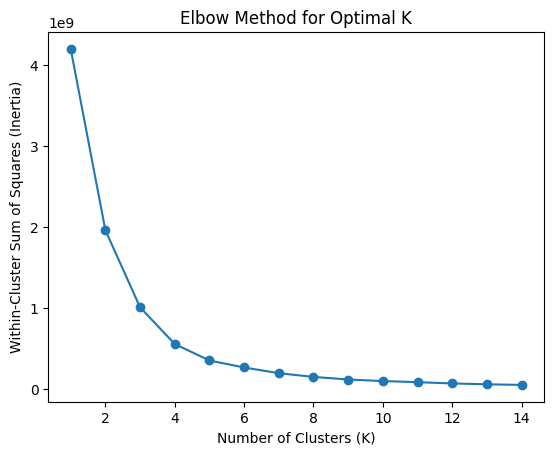


Centroids for Optimal K=5:
   REFUSAL_CHARGES  RFRNC_DOC_ID
0       557.322595  1.326893e+04
1       360.603043  1.304994e+06
2       651.577147  5.017960e+05
3       449.928319  3.423778e+06
4       546.180614  1.605260e+05

DataFrame with Cluster Assignments (Optimal K):
        RFRNC_DOC_ID  REFUSAL_CHARGES  cluster_optimal
0                 72            249.0                0
1                 11            249.0                0
2                182              NaN                4
3                 11              NaN                0
4                  1              NaN                0
...              ...              ...              ...
163878           242            249.0                4
163879            11            218.0                0
163880            12            235.0                0
163881            11              9.0                0
163882            11              NaN                0

[163883 rows x 3 columns]


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset into a DataFrame
try:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')

# Use the columns "RFRNC_DOC_ID" and "REFUSAL_CHARGES" for clustering
numerical_columns = ['REFUSAL_CHARGES']
categorical_columns = ['RFRNC_DOC_ID']

# Clean and convert "REFUSAL_CHARGES" to numeric format
df['REFUSAL_CHARGES'] = pd.to_numeric(df['REFUSAL_CHARGES'].str.replace(',', ''), errors='coerce')

# Separate numerical and categorical features
numerical_features = df[numerical_columns]
categorical_features = df[categorical_columns]

# Impute missing values in numerical features
numerical_imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = numerical_imputer.fit_transform(numerical_features)

# Standardize numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features_imputed)

# Combine standardized numerical and categorical features
df_standardized = pd.concat([pd.DataFrame(numerical_features_standardized, columns=numerical_columns), categorical_features], axis=1)

# Apply the Elbow Method
max_clusters = 15
css = []  # within-cluster sum of squares

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(df_standardized)
    css.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, max_clusters), css, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

# Determine the optimal K based on visual inspection
optimal_k = 5  # Adjust based on the Elbow graph

# Rerun K-means clustering with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, n_init=10, random_state=0)
df['cluster_optimal'] = kmeans_optimal.fit_predict(df_standardized)

# Get centroids (inverse transform to original scale)
centroids_optimal = pd.DataFrame(
    scaler.inverse_transform(kmeans_optimal.cluster_centers_),
    columns=numerical_columns + categorical_columns
)

# Print centroids for the optimal K
print(f"\nCentroids for Optimal K={optimal_k}:")
print(centroids_optimal)

# Display the DataFrame with cluster assignments for the optimal K
print("\nDataFrame with Cluster Assignments (Optimal K):")
print(df[['RFRNC_DOC_ID', 'REFUSAL_CHARGES', 'cluster_optimal']])


# The future of search and advances in supervised learning.


## Main takeaways of the interview.

The main takeaways of the interview revolve around the capabilities of Perplexity AI, the importance of a decluttered user interface and user experience of a search engine, advertising in search engines, the benefits of Perplexity and personalized learning, opinions and truths in search engines, challenges and opportunities of the new search model, and the impact on jobs and the future of learning.

## My reactions to the interview.

I found the interview interesting and informative. The comments made on advertising were insightful. Populating adverts to users in search engines provides a poor user experience. Advertising degrades the quality of knowledge. The ability of Perplexity AI to not only provide answers to questions generated by users but also provide citations is a huge positive. Moreover, the ability to follow up on previous questions and provide more information based on the context enhances the user experience.


## What i found most interesting in the interview.

One thing that i found interesting is the ability of Perplexity AI to generate answers not only in the form of text but also images. Adittionally, providing citations to the generated answers is a plus to the User Experience.


## My criticism of the work of Perplexity AI.

My criticism of the work of Perplexity AI is based on the generated citations. Providing citations to answers generated doesn't validate the information that has been cited. Some links might contain information that is not true, biased information, or information that is not factual but rather opinions. This may result in the spread of misinformation.

